In [1]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns

# Import API key
from api_keys import api_key


In [2]:
import json

# creating api call from a city though url 
base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key

#base_url="https://api.ers.usda.gov/data/arms/category?api_key=" + api_key + "&id=age,ftypll"
#https://api.ers.usda.gov/data/arms/farmtype?api_key=YOUR_API_KEY&name=operator+households
# changing the output to json 
print(base_url)
req = requests.get(base_url)
data = req.json()
print(data)

https://api.fda.gov/drug/event.json?api_key=8CNbFdll08EsavhOoWDSJ204sBafUl3X75goqqpT
{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.', 'terms': 'https://open.fda.gov/terms/', 'license': 'https://open.fda.gov/license/', 'last_updated': '2021-11-04', 'results': {'skip': 0, 'limit': 1, 'total': 14128106}}, 'results': [{'receiptdateformat': '102', 'receiver': None, 'seriousnessdeath': '1', 'companynumb': 'JACAN16471', 'receivedateformat': '102', 'primarysource': {'reportercountry': 'CANADA', 'qualification': '3'}, 'transmissiondateformat': '102', 'fulfillexpeditecriteria': '1', 'safetyreportid': '5801206-7', 'sender': {'senderorganization': 'FDA-Public Use'}, 'receivedate': '20080707', 'patient': {'patientonsetage': '26', 'patientonsetageunit': '801', 

In [3]:
cats_data = {'gender':[],
                'age':[],
                'weight':[],
                'breed':[],
                'drug':[],
                'outcome':[],
                'date_in':[]}
#base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key + '"search=animal.species:"Cat""'
base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+animal.breed.breed_component='Domestic Shorthair'"
req = requests.get(base_url)
data = req.json()

#print(data)
#https://api.fda.gov/animalandveterinary/event.json?search=animal.species:"Cat"
#if data['animal']['species']=="Cat":
cats_data['gender'].append(data['results'][0]['animal']['gender'])
cats_data['age'].append(data['results'][0]['animal']['age']['min'])
cats_data['weight'].append(data['results'][0]['animal']['weight']['min'])
cats_data['breed'].append(data['results'][0]['animal']['breed']['breed_component'])
cats_data['drug'].append(data['results'][0]['drug'][0]['active_ingredients'][0]['name'])
cats_data['outcome'].append(data['results'][0]['outcome'][0]['medical_status'])
cats_data['date_in'].append(data['results'][0]['original_receive_date'])

print(cats_data)


{'gender': ['Male'], 'age': ['10.00'], 'weight': ['6.350'], 'breed': ['Domestic Shorthair'], 'drug': ['Spinosad'], 'outcome': ['Recovered/Normal'], 'date_in': ['20170508']}


In [4]:
# option for looping - force it to skip 5 and then pick up the next one. The for loop returns 20 cats.
cats_data = {'gender':[],
                'age':[],
                'weight':[],
                'breed':[],
                'drug':[],
                'outcome':[],
                'date_in':[]}
base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+(animal.breed.breed_component='Domestic Shorthair'+OR+animal.breed.breed_component='Domestic Longhair')"
counter = 1
for i in range(500):

#base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+animal.breed.breed_component='Domestic Shorthair'"
#base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key
#base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+original_receive_date:[20040101+TO+20161107]&limit=1"
    req = requests.get(base_url)
    data = req.json()

    try:
        cats_data['age'].append(data['results'][0]['animal']['age']['min'])
    except:
        cats_data['age'].append('0')
    
    try:
        cats_data['weight'].append(data['results'][0]['animal']['weight']['min'])
    except:
        cats_data['weight'].append('0')

    try:
        cats_data['outcome'].append(data['results'][0]['outcome'][0]['medical_status'])
    except:
        cats_data['outcome'].append('Unknown')
    
    try:
        cats_data['date_in'].append(data['results'][0]['original_receive_date'])
    except:
        cats_data['date_in'].append(np.nan)

    try:
        cats_data['gender'].append(data['results'][0]['animal']['gender'])
    except:
        cats_data['gender'].append('Unknown')
    
    try:
        cats_data['breed'].append(data['results'][0]['animal']['breed']['breed_component'])
    except:
        cats_data['breed'].append('Unknown')
    
    try:
        cats_data['drug'].append(data['results'][0]['drug'][0]['active_ingredients'][0]['name'])
    except:
        cats_data['drug'].append('Unknown')
        
        
    counter +=1
    str_count = str(counter)
    base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+(animal.breed.breed_component='Domestic Shorthair'+OR+animal.breed.breed_component='Domestic Longhair')&skip=" + str_count
    
print(cats_data)

{'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Unknown', 'Male', 'Female', 'Unknown', 'Male', 'Unknown', 'Female', 'Male', 'Male', 'Male', 'Male', 'Unknown', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Unknown', 'Unknown', 'Unknown', 'Male', 'Unknown', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Unknown', 'Male', 'Male', 'Male', 'Unknown', 'Mixed', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Unknown', 'Female', 'Male', 'Unknown', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Unknown', 'Female', 'Female', 'Male', 'Fem

In [5]:
cat_df = pd.DataFrame.from_dict(cats_data)
cat_df.to_csv("cat_data.csv")
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gender   500 non-null    object
 1   age      500 non-null    object
 2   weight   500 non-null    object
 3   breed    500 non-null    object
 4   drug     500 non-null    object
 5   outcome  500 non-null    object
 6   date_in  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [6]:
cat_df.head(40)

,gender,age,weight,breed,drug,outcome,date_in
0,Male,10.00,6.350,Domestic Shorthair,Spinosad,Recovered/Normal,20170508
1,Female,12.00,3.130,Domestic Shorthair,Cefovecin,Ongoing,20171002
2,Male,1.00,4.309,Domestic Shorthair,Spinosad,Recovered/Normal,20180205
3,Female,9.00,0,Domestic Shorthair,Imidacloprid,Outcome Unknown,20190327
4,Male,5.00,6.577,Domestic Shorthair,Maropitant Citrate,Ongoing,20190220
5,Male,2.00,5.897,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,20190721
6,Male,8.00,8.845,Domestic Longhair,Spinosad,Recovered/Normal,20190307
7,Unknown,0,0,Cat (unknown),Imidacloprid,Recovered/Normal,20210503
8,Male,9.00,4.309,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,20200515
9,Female,11.00,2.722,Cat (unknown),Imidacloprid,Outcome Unknown,20210518


In [7]:
cat_df["date_in"] = pd.to_datetime(cat_df["date_in"])
#cat_df.head(15)
cat_df["Year"] = cat_df['date_in'].dt.year
cat_df.head(15)

,gender,age,weight,breed,drug,outcome,date_in,Year
0,Male,10.00,6.350,Domestic Shorthair,Spinosad,Recovered/Normal,2017-05-08,2017
1,Female,12.00,3.130,Domestic Shorthair,Cefovecin,Ongoing,2017-10-02,2017
2,Male,1.00,4.309,Domestic Shorthair,Spinosad,Recovered/Normal,2018-02-05,2018
3,Female,9.00,0,Domestic Shorthair,Imidacloprid,Outcome Unknown,2019-03-27,2019
4,Male,5.00,6.577,Domestic Shorthair,Maropitant Citrate,Ongoing,2019-02-20,2019
5,Male,2.00,5.897,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,2019-07-21,2019
6,Male,8.00,8.845,Domestic Longhair,Spinosad,Recovered/Normal,2019-03-07,2019
7,Unknown,0,0,Cat (unknown),Imidacloprid,Recovered/Normal,2021-05-03,2021
8,Male,9.00,4.309,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,2020-05-15,2020
9,Female,11.00,2.722,Cat (unknown),Imidacloprid,Outcome Unknown,2021-05-18,2021


In [8]:
cat_type = cat_df['breed'].value_counts()
cat_type

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


Domestic Shorthair                          189
Domestic (unspecified)                      163
Cat (unknown)                                66
Domestic Mediumhair                          27
Domestic Longhair                            26
Cat (other)                                  10
Mixed (Cat)                                   6
American Shorthair                            2
Crossbred Feline/cat                          2
[Maine Coon, Cat (other)]                     1
Abyssinian cat                                1
Unknown                                       1
Scottish Fold Shorthair                       1
[Cat (other), Cat (other), Cat (other)]       1
[Domestic Shorthair, Domestic Shorthair]      1
[Siamese, Mixed (Cat)]                        1
[Domestic Longhair, Maine Coon]               1
British cat                                   1
Name: breed, dtype: int64

In [9]:
drug_type = cat_df['drug'].unique()
drug_type
dt = cat_df['date_in'].unique()
dt

array(['2017-05-08T00:00:00.000000000', '2017-10-02T00:00:00.000000000',
       '2018-02-05T00:00:00.000000000', '2019-03-27T00:00:00.000000000',
       '2019-02-20T00:00:00.000000000', '2019-07-21T00:00:00.000000000',
       '2019-03-07T00:00:00.000000000', '2021-05-03T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2021-05-18T00:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2012-10-30T00:00:00.000000000',
       '1996-06-13T00:00:00.000000000', '2012-12-03T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-07-24T00:00:00.000000000',
       '2007-01-27T00:00:00.000000000', '2006-10-16T00:00:00.000000000',
       '1988-01-11T00:00:00.000000000', '1995-02-08T00:00:00.000000000',
       '2011-10-19T00:00:00.000000000', '2004-04-03T00:00:00.000000000',
       '1996-06-03T00:00:00.000000000', '2004-09-07T00:00:00.000000000',
       '1991-06-26T00:00:00.000000000', '2008-09-02T00:00:00.000000000',
       '2008-07-10T00:00:00.000000000', '2008-05-05

In [10]:
bd = cat_df[["breed", "drug"]]
bd

,breed,drug
0,Domestic Shorthair,Spinosad
1,Domestic Shorthair,Cefovecin
2,Domestic Shorthair,Spinosad
3,Domestic Shorthair,Imidacloprid
4,Domestic Shorthair,Maropitant Citrate
...,...,...
495,Domestic Shorthair,Selamectin
496,Domestic Shorthair,Spinosad
497,Cat (unknown),Praziquantel
498,Domestic Shorthair,Phytosphingosine Salicyloyl


In [11]:
dom_sh = cat_df[cat_df["breed"] == 'Domestic Shorthair']
dom_sh

,gender,age,weight,breed,drug,outcome,date_in,Year
0,Male,10.00,6.350,Domestic Shorthair,Spinosad,Recovered/Normal,2017-05-08,2017
1,Female,12.00,3.130,Domestic Shorthair,Cefovecin,Ongoing,2017-10-02,2017
2,Male,1.00,4.309,Domestic Shorthair,Spinosad,Recovered/Normal,2018-02-05,2018
3,Female,9.00,0,Domestic Shorthair,Imidacloprid,Outcome Unknown,2019-03-27,2019
4,Male,5.00,6.577,Domestic Shorthair,Maropitant Citrate,Ongoing,2019-02-20,2019
...,...,...,...,...,...,...,...,...
493,Female,1.00,3.180,Domestic Shorthair,Praziquantel,Recovered/Normal,2017-03-13,2017
495,Male,8.00,9.979,Domestic Shorthair,Selamectin,Outcome Unknown,2017-05-12,2017
496,Female,3.00,5.126,Domestic Shorthair,Spinosad,Recovered/Normal,2016-05-10,2016
498,Female,2.00,5.443,Domestic Shorthair,Phytosphingosine Salicyloyl,Ongoing,2018-02-07,2018


In [12]:
dom_un = cat_df[cat_df["breed"] == 'Domestic (unspecified)']
dom_un

,gender,age,weight,breed,drug,outcome,date_in,Year
16,Male,2.00,6.350,Domestic (unspecified),Pyrantel Pamoate,Unknown,2007-01-27,2007
17,Male,10.00,5.500,Domestic (unspecified),Enrofloxacin,Unknown,2006-10-16,2006
20,Male,15.00,8.160,Domestic (unspecified),Cyclosporine,Unknown,2011-10-19,2011
21,Female,17.00,3.180,Domestic (unspecified),Ketamine Hydrochloride,Unknown,2004-04-03,2004
22,Male,2.00,4.990,Domestic (unspecified),Lufenuron,Unknown,1996-06-03,1996
...,...,...,...,...,...,...,...,...
479,Unknown,9.00,7.260,Domestic (unspecified),Carprofen,Unknown,1998-08-05,1998
480,Mixed,0,0,Domestic (unspecified),Selamectin,Unknown,2010-09-02,2010
483,Female,10.00,5.220,Domestic (unspecified),Carprofen,Unknown,2000-04-05,2000
485,Male,6.00,7.260,Domestic (unspecified),Selamectin,Unknown,2005-04-08,2005


In [13]:
cat_un = cat_df[cat_df["breed"] == 'Cat (unknown)']
cat_un

,gender,age,weight,breed,drug,outcome,date_in,Year
7,Unknown,0,0,Cat (unknown),Imidacloprid,Recovered/Normal,2021-05-03,2021
9,Female,11.00,2.722,Cat (unknown),Imidacloprid,Outcome Unknown,2021-05-18,2021
10,Unknown,0,0,Cat (unknown),Praziquantel,Outcome Unknown,2021-06-24,2021
12,Unknown,.00,3.180,Cat (unknown),Griseofulvin,Unknown,1996-06-13,1996
18,Unknown,3.00,3.180,Cat (unknown),Ketamine Hydrochloride,Unknown,1988-01-11,1988
...,...,...,...,...,...,...,...,...
471,Female,18.00,3.860,Cat (unknown),Spinosad,Recovered/Normal,2013-10-31,2013
482,Female,3.00,5.220,Cat (unknown),Imidacloprid,Outcome Unknown,2015-01-17,2015
486,Male,0,0,Cat (unknown),"Emodepside, Praziquantel",Unknown,2009-02-12,2009
494,Unknown,0,6.169,Cat (unknown),Nitenpyram,Outcome Unknown,2015-11-10,2015


In [14]:
dom_md = cat_df[cat_df["breed"] == 'Domestic Mediumhair']
dom_md

,gender,age,weight,breed,drug,outcome,date_in,Year
38,Female,3.00,6.396,Domestic Mediumhair,Spinosad,Recovered/Normal,2016-11-09,2016
44,Male,6.00,7.484,Domestic Mediumhair,Fluralaner Spot-On Solution,Ongoing,2018-04-16,2018
45,Female,0,0,Domestic Mediumhair,Selamectin,Ongoing,2018-10-08,2018
49,Female,7.00,4.445,Domestic Mediumhair,Buprenorphine,Ongoing,2020-10-21,2020
53,Male,6.00,5.440,Domestic Mediumhair,Spinosad,Recovered/Normal,2013-06-10,2013
72,Male,3.00,5.130,Domestic Mediumhair,Selamectin,Outcome Unknown,2014-05-20,2014
105,Female,6.00,5.897,Domestic Mediumhair,Praziquantel,Outcome Unknown,2021-03-03,2021
106,Male,3.00,4.354,Domestic Mediumhair,Fluralaner Spot-On Solution,Ongoing,2020-08-26,2020
135,Male,7.00,5.180,Domestic Mediumhair,Selamectin,Ongoing,2018-12-14,2018
145,Male,8.00,4.540,Domestic Mediumhair,Spinosad,Euthanized,2013-06-17,2013


In [15]:
dom_lg = cat_df[cat_df["breed"] == 'Domestic Longhair']
dom_lg

,gender,age,weight,breed,drug,outcome,date_in,Year
6,Male,8.00,8.845,Domestic Longhair,Spinosad,Recovered/Normal,2019-03-07,2019
11,Male,8.00,4.540,Domestic Longhair,Spinosad,Recovered/Normal,2012-10-30,2012
14,Male,7.00,5.400,Domestic Longhair,Pradofloxacin,Recovered/Normal,2013-07-25,2013
35,Male,15.00,5.897,Domestic Longhair,Spinosad,Recovered/Normal,2015-05-19,2015
69,Female,10.00,3.900,Domestic Longhair,Spinosad,Recovered with Sequela,2012-09-14,2012
70,Male,12.00,1.910,Domestic Longhair,Selamectin,Outcome Unknown,2014-07-29,2014
93,Male,2.00,5.443,Domestic Longhair,Spinosad,Ongoing,2016-04-05,2016
99,Female,6.00,4.128,Domestic Longhair,Spinosad,Recovered/Normal,2017-08-08,2017
102,Female,6.00,3.266,Domestic Longhair,Selamectin,Ongoing,2019-01-15,2019
108,Female,7.00,4.990,Domestic Longhair,Nitenpyram,Recovered/Normal,2012-10-17,2012


In [16]:
cat_o = cat_df[cat_df["breed"] == 'Cat (other)']
cat_o

,gender,age,weight,breed,drug,outcome,date_in,Year
39,Unknown,0,0,Cat (other),Selamectin,Died,2016-07-20,2016
43,Unknown,0,0,Cat (other),Atipamezole Hydrochloride,Outcome Unknown,2015-12-23,2015
92,Unknown,0,0,Cat (other),Cefovecin,Outcome Unknown,2016-03-29,2016
103,Unknown,0,0,Cat (other),Selamectin,Outcome Unknown,2019-01-26,2019
128,Female,3.00,4.536,Cat (other),Selamectin,Recovered/Normal,2017-06-01,2017
136,Female,1.50,3.180,Cat (other),Nitenpyram,Outcome Unknown,2021-04-23,2021
167,Male,0,4.990,Cat (other),Selamectin;Sarolaner,Outcome Unknown,2020-10-12,2020
318,Unknown,0,0,Cat (other),Selamectin,Outcome Unknown,2017-02-17,2017
333,Unknown,5.00,3.175,Cat (other),Selamectin;Sarolaner,Outcome Unknown,2020-09-29,2020
492,Unknown,0,6.350,Cat (other),Selamectin,Ongoing,2016-08-18,2016


In [17]:
cat_o = cat_df[cat_df["breed"] == 'Cat (other)']
cat_o['drug']

39                    Selamectin
43     Atipamezole Hydrochloride
92                     Cefovecin
103                   Selamectin
128                   Selamectin
136                   Nitenpyram
167         Selamectin;Sarolaner
318                   Selamectin
333         Selamectin;Sarolaner
492                   Selamectin
Name: drug, dtype: object

In [18]:
cat_o[["breed", "drug","Year"]]

,breed,drug,Year
39,Cat (other),Selamectin,2016
43,Cat (other),Atipamezole Hydrochloride,2015
92,Cat (other),Cefovecin,2016
103,Cat (other),Selamectin,2019
128,Cat (other),Selamectin,2017
136,Cat (other),Nitenpyram,2021
167,Cat (other),Selamectin;Sarolaner,2020
318,Cat (other),Selamectin,2017
333,Cat (other),Selamectin;Sarolaner,2020
492,Cat (other),Selamectin,2016


In [19]:
dom_md[["breed", "drug", "outcome", "Year"]]
dom_sh[["breed", "drug", "outcome", "Year"]]
dom_un[["breed", "drug", "outcome","Year"]]
cat_un[["breed", "drug", "outcome","Year"]]
dom_lg[["breed", "drug", "outcome","Year"]].sort_values("Year", ascending = True)

,breed,drug,outcome,Year
11,Domestic Longhair,Spinosad,Recovered/Normal,2012
69,Domestic Longhair,Spinosad,Recovered with Sequela,2012
108,Domestic Longhair,Nitenpyram,Recovered/Normal,2012
146,Domestic Longhair,Spinosad,Recovered/Normal,2013
14,Domestic Longhair,Pradofloxacin,Recovered/Normal,2013
390,Domestic Longhair,Cefovecin,Outcome Unknown,2013
222,Domestic Longhair,Spinosad,Recovered/Normal,2014
429,Domestic Longhair,Nitenpyram,Outcome Unknown,2014
70,Domestic Longhair,Selamectin,Outcome Unknown,2014
262,Domestic Longhair,Spinosad,Recovered/Normal,2014


In [20]:
cat_df.dtypes
cat_df_2 = cat_df.astype({"age": float, "weight": float, "breed": str, "drug": str, "outcome": str})
cat_df_2.head(20)
cat_df_2.dtypes
#e=c.sort_values("Year", ascending = True)
#e

gender             object
age               float64
weight            float64
breed              object
drug               object
outcome            object
date_in    datetime64[ns]
Year                int64
dtype: object

In [21]:
f=dom_sh[dom_sh["outcome"] == 'Died'].value_counts()
#f.sort_values("Year", ascending = True)
f
#f[f["drug"] == 'Cefovecin']

gender  age    weight  breed               drug                           outcome  date_in     Year
Female  13.00  3.901   Domestic Shorthair  Praziquantel                   Died     2019-12-26  2019    1
        20.00  3.175   Domestic Shorthair  Cefovecin                      Died     2016-07-14  2016    1
        4.00   4.082   Domestic Shorthair  Praziquantel                   Died     2016-06-17  2016    1
        6.00   3.266   Domestic Shorthair  Dexmedetomidine Hydrochloride  Died     2016-11-01  2016    1
Male    12.50  5.170   Domestic Shorthair  Cefovecin                      Died     2014-02-26  2014    1
        4.00   .454    Domestic Shorthair  Itraconazole                   Died     2017-06-27  2017    1
        6.50   6.804   Domestic Shorthair  Selamectin                     Died     2018-04-30  2018    1
dtype: int64

In [22]:
f=cat_df_2[cat_df_2["outcome"] == 'Died'].value_counts()

#f.sort_values("Year", ascending = True)
f
#f[f["drug"] == 'Cefovecin']

gender   age   weight  breed                   drug                               outcome  date_in     Year
Female   0.0   4.540   Domestic (unspecified)  Ketamine Hydrochloride             Died     1989-03-23  1989    1
         4.0   1.950   Cat (unknown)           Ketamine Hydrochloride             Died     2014-08-19  2014    1
Male     6.0   0.680   Domestic (unspecified)  Amoxicillin, Clavulanate           Died     2000-10-13  2000    1
               3.630   American Shorthair      Clindamycin Hydrochloride          Died     2010-08-06  2010    1
         6.5   6.804   Domestic Shorthair      Selamectin                         Died     2018-04-30  2018    1
         7.0   0.540   Domestic (unspecified)  Selamectin                         Died     2003-07-01  2003    1
         8.0   6.260   Domestic (unspecified)  Tiletamine, Zolazepam              Died     2004-12-13  2004    1
         11.0  3.180   Domestic (unspecified)  Cefovecin Sodium                   Died     2012-01-11

# Is there a drug that created more adverse reactions?


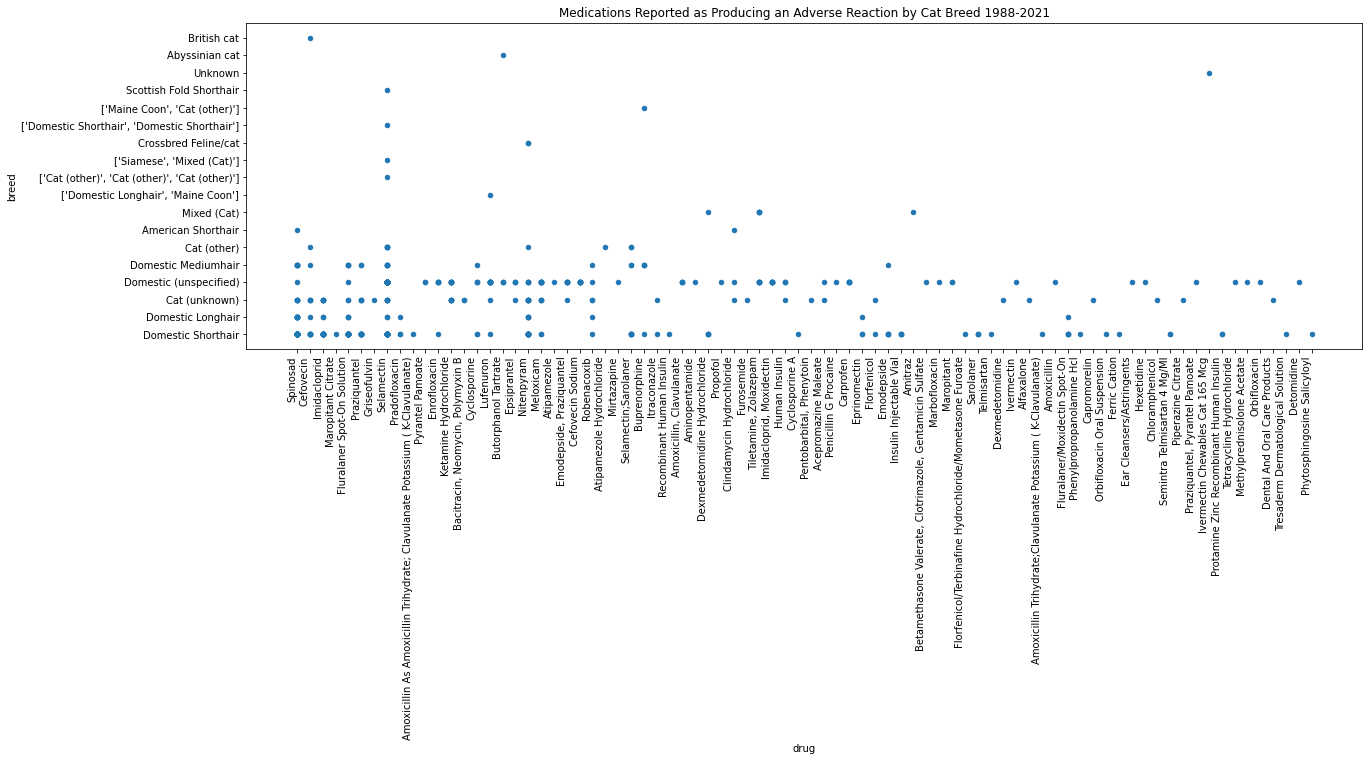

In [84]:
#create scatter plot
cat_df_2.plot( y='breed', x='drug', kind='scatter', figsize=(20,6))
#create labels 
#plt.xlabel('x')
#plt.ylabel('y')
 
# display the title
plt.title("Medications Reported as Producing an Adverse Reaction by Cat Breed 1988-2021")
#Rotate axis text
plt.xticks(rotation=90, ha='right')
#save image
plt.savefig("Medications Reported as Producing an Adverse Reaction by Cat Breed 1988-2021.png") 
#show plot
plt.show()

# At what ages do cats experience mortality from adverse reactions?


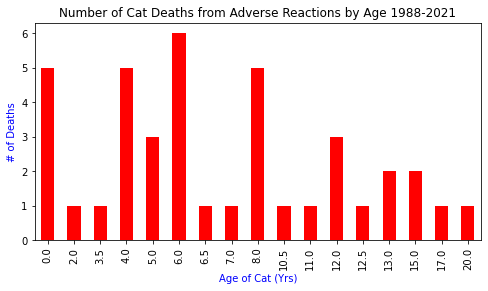

In [83]:
#sort data by deaths 
g=cat_df_2[cat_df_2["outcome"] == 'Died']
#count deaths by age and sort order
h=g["age"].value_counts().sort_index()
#h
#create bar graph
h.plot(kind="bar", x="age", figsize=(8,4), color="red")
#create labels 
plt.xlabel('Age of Cat (Yrs)',color="blue")
plt.ylabel('# of Deaths',color="blue" )
 
# display the title
plt.title("Number of Cat Deaths from Adverse Reactions by Age 1988-2021")
#plt.xticks(rotation=45, ha='right')
#save image
plt.savefig("Number of Cat Deaths by Age 1988-2021.png") 
#show plot
plt.show()


# Is there a breed that experiences more adverse reations?


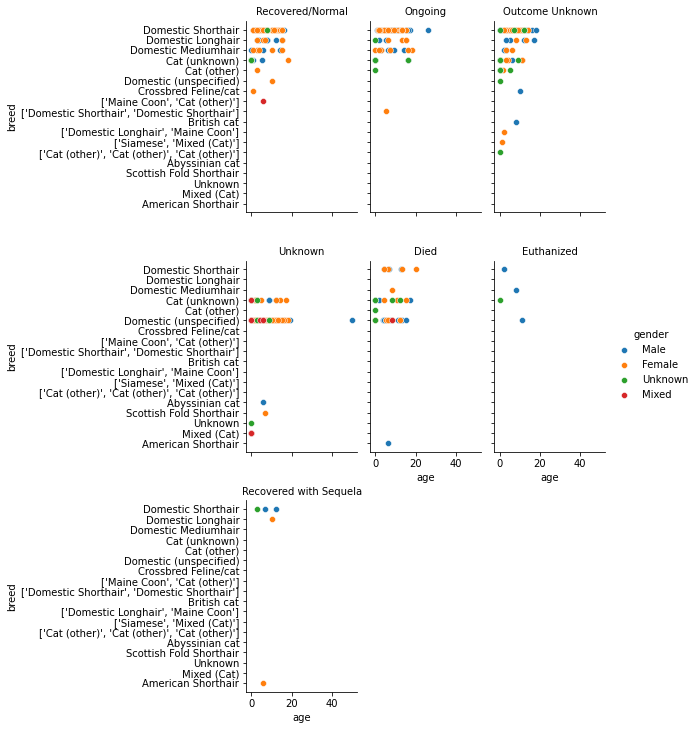

In [85]:
l = sns.FacetGrid(cat_df_2, col="outcome", hue="gender", col_wrap=3)

l.map(sns.scatterplot, "age", "breed")

l.add_legend()
plt.subplots_adjust(top=1.1)
l.set_titles("{col_name}")

#l.fig.suptitle('Reported Cat Medication Reaction Outcomes by Breed and Age 1989-2021')
#save image'Reported Cat Medication Reaction Outcomes by Breed and Age 1989-2021'
plt.savefig("Reported Cat Medication Reaction Outcomes by Breed and Age 1989-2021.png") 
plt.show()

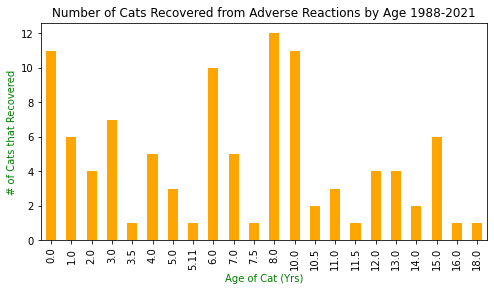

In [92]:
#sort data by deaths 
g=cat_df_2[cat_df_2["outcome"] == 'Recovered/Normal']
#count deaths by age and sort order
h=g["age"].value_counts().sort_index()
#h
#create bar graph
h.plot(kind="bar", x="age", figsize=(8,4), color="orange")
#create labels 
plt.xlabel('Age of Cat (Yrs)',color="green")
plt.ylabel('# of Cats that Recovered',color="green" )
 
# display the title
plt.title("Number of Cats Recovered from Adverse Reactions by Age 1988-2021")
#plt.xticks(rotation=45, ha='right')
#save image
plt.savefig("Number of Cats Recovered from Adverse Reactions by Age 1988-2021.png") 
#show plot
plt.show()

In [ ]:
f[f["drug"] == '']

In [ ]:
l = sns.FacetGrid(cat_df_2, col="outcome", hue="gender", col_wrap=3)

l.map(sns.scatterplot, "age", "breed")

l.add_legend()
plt.subplots_adjust(top=1.1)
l.set_titles("{col_name}")

#l.fig.suptitle('Reported Cat Medication Reaction Outcomes by Breed and Age 1989-2021')

plt.show()

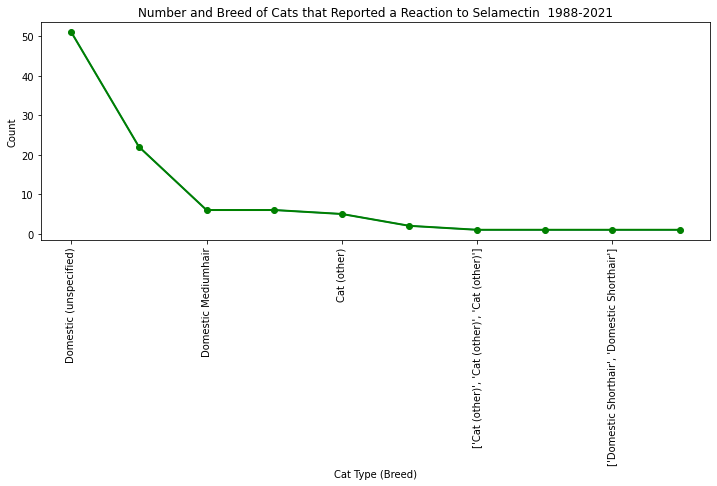

In [91]:
#sort data by deaths 
d=cat_df_2[cat_df_2["drug"] == 'Selamectin']
q=cat_df_2[cat_df_2["breed"] == 'Domestic Shorthair']
#count deaths by age and sort order
m=d["breed"].value_counts()
#h
#create bar graph
m.plot(x="breed", figsize=(12,4))
#create labels 
plt.xlabel('Cat Type (Breed)')
plt.ylabel('Count' )
#plots df "go-" creates a green line with circles
plt.plot(m, 'go-', linewidth=2)
#tick marks
plt.tick_params('y') 
# display the title
plt.title("Number and Breed of Cats that Reported a Reaction to Selamectin  1988-2021")
plt.xticks(rotation=90)
plt.savefig("Number and Breed of Cats that Reported a Reaction to Selamectin  1988-2021.png") 
#show plot
#plt.show()

In [ ]:
t_5=jep_df['Category'].value_counts()[:5]

In [27]:
cat_df_2[["breed", "drug","Year"]]


,breed,drug,Year
0,Domestic Shorthair,Spinosad,2017
1,Domestic Shorthair,Cefovecin,2017
2,Domestic Shorthair,Spinosad,2018
3,Domestic Shorthair,Imidacloprid,2019
4,Domestic Shorthair,Maropitant Citrate,2019
...,...,...,...
495,Domestic Shorthair,Selamectin,2017
496,Domestic Shorthair,Spinosad,2016
497,Cat (unknown),Praziquantel,2017
498,Domestic Shorthair,Phytosphingosine Salicyloyl,2018


In [26]:
#graph = sns.FacetGrid(cat_df_2, row ='weight', col ='breed')
# map the above form facetgrid with some attributes
#graph.map(plt.hist, 'outcome', color ='orange')
# show the object
#plt.show()